In [67]:
# !pip install tensorflow
# !pip install dice-ml
# !pip install matplotlib
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install shap
# !pip install plotly
# !pip install nbformat>=4.2.0 

In [68]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.cluster import KMeans


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn.model_selection import cross_val_score

In [69]:
current_path = os.path.dirname(os.getcwd())

DATA_PATH = os.path.join(current_path, 'data\\')
filename1 = DATA_PATH + 'LivestockSense_PIG_database_060922_encoded_16_11_2022_improved_no_Q2_Q3_Q6.csv'
filename2 = DATA_PATH + 'LivestockSense_POULTRY_database_060922_encoded_16_11_2022_improved_no_Q2_Q3_Q6.csv'


data1 = pd.read_csv(filename1)
data2 = pd.read_csv(filename2)


file = filename1.split('.')
filename = file[0] + '.csv'

data = pd.concat([data1, data2], axis=0)

data.reset_index(drop=True, inplace=True)
data.head()


,Q4,Q5,Q8_a,Q8_b,Q8_c,Q8_d,Q8_e,Q8_f,Q8_g,Q8_h,...,Q19_a,Q19_b,Q19_e,Q19_g,Q19_i,Q19_o,S_I,S_II,S_IV,S_V
0,3.0,2.0,5,4,4,3,4,4,4,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
1,2.0,2.0,5,5,1,1,4,4,4,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,4.0,2.0,4,4,4,5,5,4,4,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0
3,4.0,2.0,5,5,5,5,5,5,5,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0
4,2.0,2.0,3,5,4,5,5,3,3,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0


In [70]:
chosen_cols = ['Q4', 'Q5', 'Q8_a', 'Q8_b', 'Q8_c', 'Q8_d', 'Q8_e',
       'Q8_g', 'Q8_h', 'Q9_a', 'Q9_b', 'Q9_c', 'Q9_d', 'Q9_e',
       'Q10_a', 'Q10_b', 'Q10_c', 'Q10_d', 'Q10_e', 'Q11']

original_data = data.copy()
data = data[chosen_cols]

In [71]:
rename_chosen_cols = {
    'Q4': 'Q1. Average availability of internet', 
    'Q5': 'Q2. Average level of automatization', 
    'Q8_a': 'Q3_a. TECH helps labor shortage', 
    'Q8_b': 'Q3_b. TECH helps day-to-day decision making', 
    'Q8_c': 'Q3_c. TECH helps enterprise, marketing and investment decisions', 
    'Q8_d': 'Q3_d. TECH helps meet environmental pollution reduction obligations', 
    'Q8_e': 'Q3_e. TECH enables the increase production effectiveness',
    'Q8_g': 'Q3_g. TECH provides information in a real-time manner', 
    'Q8_h': 'Q3_f. TECH provides reliable information',
    'Q9_a': 'Q4_a. It is easy to access TECH on the market', 
    'Q9_b': 'Q4_b. TECH can be purchased at an affordable price', 
    'Q9_c': 'Q4_c. It is easy to get information on TECH and distributors',
    'Q9_d': 'Q4_d. It is easy to get technical assistance to smart technologies', 
    'Q9_e': 'Q4_e. Proper education is available for using smart technologies',
    'Q10_a': 'Q5_a. TECH can be maintained at a reasonable cost', 
    'Q10_b': 'Q5_b. TECH is easy to operate', 
    'Q10_c': 'Q5_c. TECH can be connected well with other equipment/software', 
    'Q10_d': 'Q5_d. TECH operates in a reliable manner', 
    'Q10_e': 'Q5_e. TECH is secure in terms of data management', 
    'Q11': 'Q6. TECH usage'
}

data = data.rename(columns=rename_chosen_cols)

# get a list of all unique values from data
unique_values = []
for col in data.columns:
    unique_values.append(data[col].unique())
    # print(col, data[col].unique())
    # print the count of values per each col
    print(col, '\n', data[col].value_counts(), '\n\n')

Q1. Average availability of internet 
 2.0    118
4.0     93
3.0     50
1.0      5
Name: Q1. Average availability of internet, dtype: int64 


Q2. Average level of automatization 
 2.0    247
1.0     15
0.0      4
Name: Q2. Average level of automatization, dtype: int64 


Q3_a. TECH helps labor shortage 
 5    72
3    52
4    50
1    49
2    33
0    10
Name: Q3_a. TECH helps labor shortage, dtype: int64 


Q3_b. TECH helps day-to-day decision making 
 5    98
4    85
3    39
1    21
2    18
0     5
Name: Q3_b. TECH helps day-to-day decision making, dtype: int64 


Q3_c. TECH helps enterprise, marketing and investment decisions 
 4    71
5    67
3    63
2    32
1    21
0    12
Name: Q3_c. TECH helps enterprise, marketing and investment decisions, dtype: int64 


Q3_d. TECH helps meet environmental pollution reduction obligations 
 5    86
3    57
4    53
1    30
2    28
0    12
Name: Q3_d. TECH helps meet environmental pollution reduction obligations, dtype: int64 


Q3_e. TECH enables 

c:\Users\corpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Previous dataset
0    149
1    117
Name: labels, dtype: int64


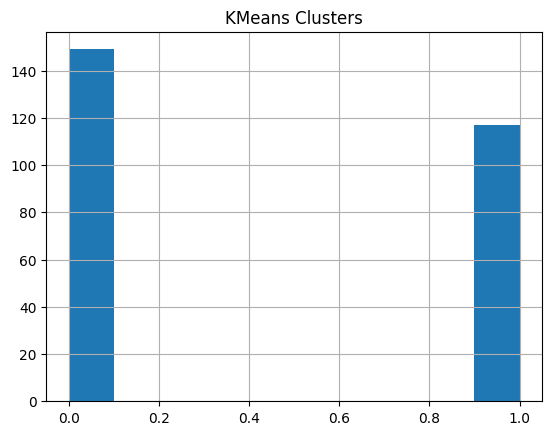

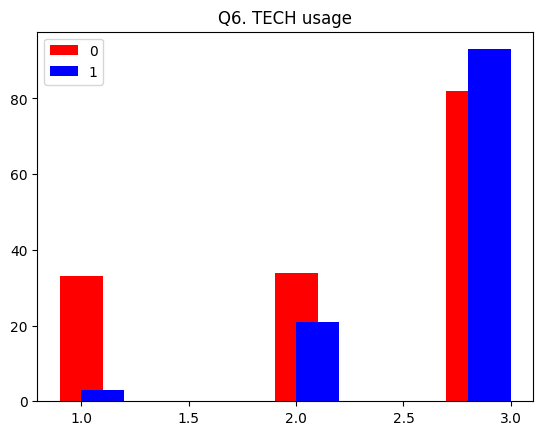

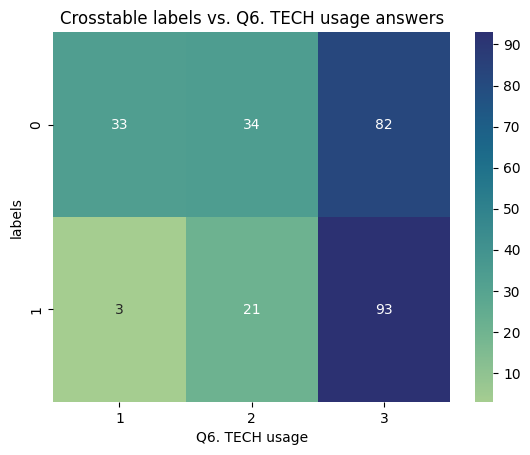

In [89]:
no_clusters= 2
km = KMeans(n_clusters=no_clusters, random_state=420)
clusters = km.fit_predict(data)

#join data with labels 
labels = pd.DataFrame(clusters)
labeledData_kmeans = pd.concat((data, labels),axis=1)
labeledData_kmeans = labeledData_kmeans.rename({0:'labels'},axis=1)
labeledData_kmeans.labels.hist().set(title='KMeans Clusters')
plt.savefig('..\images\histogram_2labels.png')


file = filename.split('.')
filename_aux = file[0] + '_kmeans_labels.' + file[1]
labeledData_kmeans.to_csv(filename_aux, index=False)

label_1 = labeledData_kmeans[labeledData_kmeans['labels'] == 1].copy()
label_0 = labeledData_kmeans[labeledData_kmeans['labels'] == 0].copy()

plt.figure()
question = 'Q6. TECH usage'
plt.hist(label_0[question], color='red', align='left')#.set(title=question)
plt.hist(label_1[question], color='blue', align='mid')#.set(title=question)
plt.title(question)
plt.legend(['0',  '1'])
plt.savefig('..\images\histogram_2labels_vs_Q6.png')


plt.figure()
sns.heatmap(pd.crosstab(labeledData_kmeans['labels'], labeledData_kmeans[question]), cmap="crest", annot=True).set(title='Crosstable labels vs. Q6. TECH usage answers')
print('Previous dataset')
print(labeledData_kmeans['labels'].value_counts())
plt.savefig('..\images\Crosstable_old labels_vs_Q6. TECH usage_3labes.png')


In [73]:

####### Choose between new kmeans clustering and the old one:

df_aux = labeledData_kmeans.copy()
# df = pd.read_csv(DATA_PATH + 'web tool deliverables\\final_labelled_data.csv')
# rename_chosen_cols = {
#     'Q1': 'Q1. Average availability of internet', 
#     'Q2': 'Q2. Average level of automatization', 
#     'Q3_a': 'Q3_a. TECH helps labor shortage', 
#     'Q3_b': 'Q3_b. TECH helps day-to-day decision making', 
#     'Q3_c': 'Q3_c. TECH helps enterprise, marketing and investment decisions', 
#     'Q3_d': 'Q3_d. TECH helps meet environmental pollution reduction obligations', 
#     'Q3_e': 'Q3_e. TECH enables the increase production effectiveness',
#     'Q3_f': 'Q3_f. improves transparency',
#     'Q3_g': 'Q3_g. TECH provides reliable information', 
#     'Q3_h': 'Q3_h. TECH provides information in a real-time manner',
#     'Q3_i': 'Q3_i. TECH contributes to early detection of problems',
#     'Q4_a': 'Q4_a. It is easy to access TECH on the market', 
#     'Q4_b': 'Q4_b. TECH can be purchased at an affordable price', 
#     'Q4_c': 'Q4_c. It is easy to get information on TECH and distributors',
#     'Q4_d': 'Q4_d. It is easy to get technical assistance to smart technologies', 
#     'Q4_e': 'Q4_e. Proper education is available for using smart technologies',
#     'Q5_a': 'Q5_a. TECH can be maintained at a reasonable cost', 
#     'Q5_b': 'Q5_b. TECH is easy to operate', 
#     'Q5_c': 'Q5_c. TECH can be connected well with other equipment/software', 
#     'Q5_d': 'Q5_d. TECH operates in a reliable manner', 
#     'Q5_e': 'Q5_e. TECH is secure in terms of data management', 
#     'Q6': 'Q6. TECH usage'
# }


# df = df.rename(columns=rename_chosen_cols)

# # if 'labels' in df.columns:
# #     df['labels'].replace({0:'aux_val', 2:0}, inplace=True)
# #     df['labels'].replace({'aux_val':2}, inplace=True)

df = df_aux.copy()

df

,Q1. Average availability of internet,Q2. Average level of automatization,Q3_a. TECH helps labor shortage,Q3_b. TECH helps day-to-day decision making,"Q3_c. TECH helps enterprise, marketing and investment decisions",Q3_d. TECH helps meet environmental pollution reduction obligations,Q3_e. TECH enables the increase production effectiveness,Q3_g. TECH provides information in a real-time manner,Q3_f. TECH provides reliable information,Q4_a. It is easy to access TECH on the market,...,Q4_c. It is easy to get information on TECH and distributors,Q4_d. It is easy to get technical assistance to smart technologies,Q4_e. Proper education is available for using smart technologies,Q5_a. TECH can be maintained at a reasonable cost,Q5_b. TECH is easy to operate,Q5_c. TECH can be connected well with other equipment/software,Q5_d. TECH operates in a reliable manner,Q5_e. TECH is secure in terms of data management,Q6. TECH usage,labels
0,3.0,2.0,5,4,4,3,4,4,3,5,...,4,5,2,1,5,0,5,5,2,1
1,2.0,2.0,5,5,1,1,4,4,5,5,...,5,5,5,4,5,2,5,3,3,1
2,4.0,2.0,4,4,4,5,5,4,5,5,...,4,4,3,4,5,4,5,3,3,1
3,4.0,2.0,5,5,5,5,5,5,5,5,...,4,5,5,3,4,3,5,4,3,1
4,2.0,2.0,3,5,4,5,5,3,5,5,...,5,4,4,4,5,0,4,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2.0,2.0,1,4,3,4,4,4,4,5,...,5,4,0,4,4,4,3,0,3,0
262,2.0,2.0,4,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,4,1,0
263,4.0,2.0,3,5,3,3,4,4,4,0,...,0,2,2,2,2,2,3,0,3,0
264,4.0,2.0,5,5,5,5,5,5,5,5,...,5,4,4,4,4,4,5,4,3,1


In [74]:
question = 'labels'
import plotly.express as px
from sklearn.decomposition import PCA, KernelPCA, FastICA


aux_data = df.drop(columns=[question], axis=1)

# Compute PCA
pca = PCA(n_components=4)

components = pca.fit_transform(aux_data)
# todo print hello world


labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df_aux[question],
    title='PCA:  {} - {} '.format(no_clusters, question),
    color_continuous_scale=px.colors.diverging.RdYlBu
)
# change the


fig.update_traces(diagonal_visible=False)
fig.show()
plt.savefig('..\images\PCA_{} - {}.png'.format(no_clusters, question))

# Counterfactual explanations

In [75]:
from sklearn.inspection import PartialDependenceDisplay
import dice_ml


# Define the column you want to achieve a specific value for
column_of_interest = 'labels'


In [76]:
df

,Q1. Average availability of internet,Q2. Average level of automatization,Q3_a. TECH helps labor shortage,Q3_b. TECH helps day-to-day decision making,"Q3_c. TECH helps enterprise, marketing and investment decisions",Q3_d. TECH helps meet environmental pollution reduction obligations,Q3_e. TECH enables the increase production effectiveness,Q3_g. TECH provides information in a real-time manner,Q3_f. TECH provides reliable information,Q4_a. It is easy to access TECH on the market,...,Q4_c. It is easy to get information on TECH and distributors,Q4_d. It is easy to get technical assistance to smart technologies,Q4_e. Proper education is available for using smart technologies,Q5_a. TECH can be maintained at a reasonable cost,Q5_b. TECH is easy to operate,Q5_c. TECH can be connected well with other equipment/software,Q5_d. TECH operates in a reliable manner,Q5_e. TECH is secure in terms of data management,Q6. TECH usage,labels
0,3.0,2.0,5,4,4,3,4,4,3,5,...,4,5,2,1,5,0,5,5,2,1
1,2.0,2.0,5,5,1,1,4,4,5,5,...,5,5,5,4,5,2,5,3,3,1
2,4.0,2.0,4,4,4,5,5,4,5,5,...,4,4,3,4,5,4,5,3,3,1
3,4.0,2.0,5,5,5,5,5,5,5,5,...,4,5,5,3,4,3,5,4,3,1
4,2.0,2.0,3,5,4,5,5,3,5,5,...,5,4,4,4,5,0,4,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2.0,2.0,1,4,3,4,4,4,4,5,...,5,4,0,4,4,4,3,0,3,0
262,2.0,2.0,4,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,4,1,0
263,4.0,2.0,3,5,3,3,4,4,4,0,...,0,2,2,2,2,2,3,0,3,0
264,4.0,2.0,5,5,5,5,5,5,5,5,...,5,4,4,4,4,4,5,4,3,1


Confusion Matrix:
[[ 0 33 34 82]
 [ 0  3 21 93]
 [ 0  0  0  0]
 [ 0  0  0  0]]


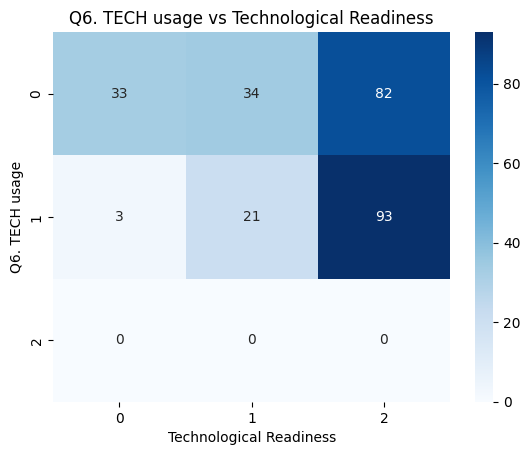

In [86]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(df['labels'], df['Q6. TECH usage'])

print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix[:-1, 1:], annot=True, fmt='d', cmap='Blues')#, xticklabels=['1. Not Ready', '2. Partially Ready', '3. Ready'], yticklabels=['1. No', '2. No, but maybe\n yes in future', '3. Yes'])
plt.xlabel('Technological Readiness')
plt.ylabel('Q6. TECH usage')
plt.title('Q6. TECH usage vs Technological Readiness')
plt.show()
plt.savefig('..\images\Confusion_matrix_{} - {}.png'.format(no_clusters, question))

In [78]:
# plot a scattermatrix with the distributions of each column from the dataframe df


In [79]:
# split the data into train and test sets
X = df.drop(columns=[column_of_interest], axis=1)
y = df[column_of_interest]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [80]:
X_train.columns[X_train.columns.duplicated()]

Index([], dtype='object')

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, criterion='entropy')

# fit the model on the training data
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# compute the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

# compute the precision of the model
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}%".format(precision * 100))

# compute the recall of the model

recall = recall_score(y_test, y_pred, average='weighted')

print("Recall: {:.2f}%".format(recall * 100))

feature_importances = pd.DataFrame(clf.feature_importances_,
                                index = X_train.columns,
                                columns = ['importance']).sort_values('importance', 
                                                                ascending=False)

print(feature_importances)



Accuracy: 95.52%
Precision: 95.86%
Recall: 95.52%
                                                    importance
Q4_d. It is easy to get technical assistance to...    0.181403
Q3_a. TECH helps labor shortage                       0.099786
Q4_e. Proper education is available for using s...    0.098935
Q4_c. It is easy to get information on TECH and...    0.086815
Q4_a. It is easy to access TECH on the market         0.071771
Q5_a. TECH can be maintained at a reasonable cost     0.055638
Q5_d. TECH operates in a reliable manner              0.052068
Q4_b. TECH can be purchased at an affordable price    0.048557
Q5_b. TECH is easy to operate                         0.046298
Q5_e. TECH is secure in terms of data management      0.042647
Q3_c. TECH helps enterprise, marketing and inve...    0.038831
Q3_e. TECH enables the increase production effe...    0.038460
Q3_d. TECH helps meet environmental pollution r...    0.035677
Q3_b. TECH helps day-to-day decision making           0.027207
Q5_c.

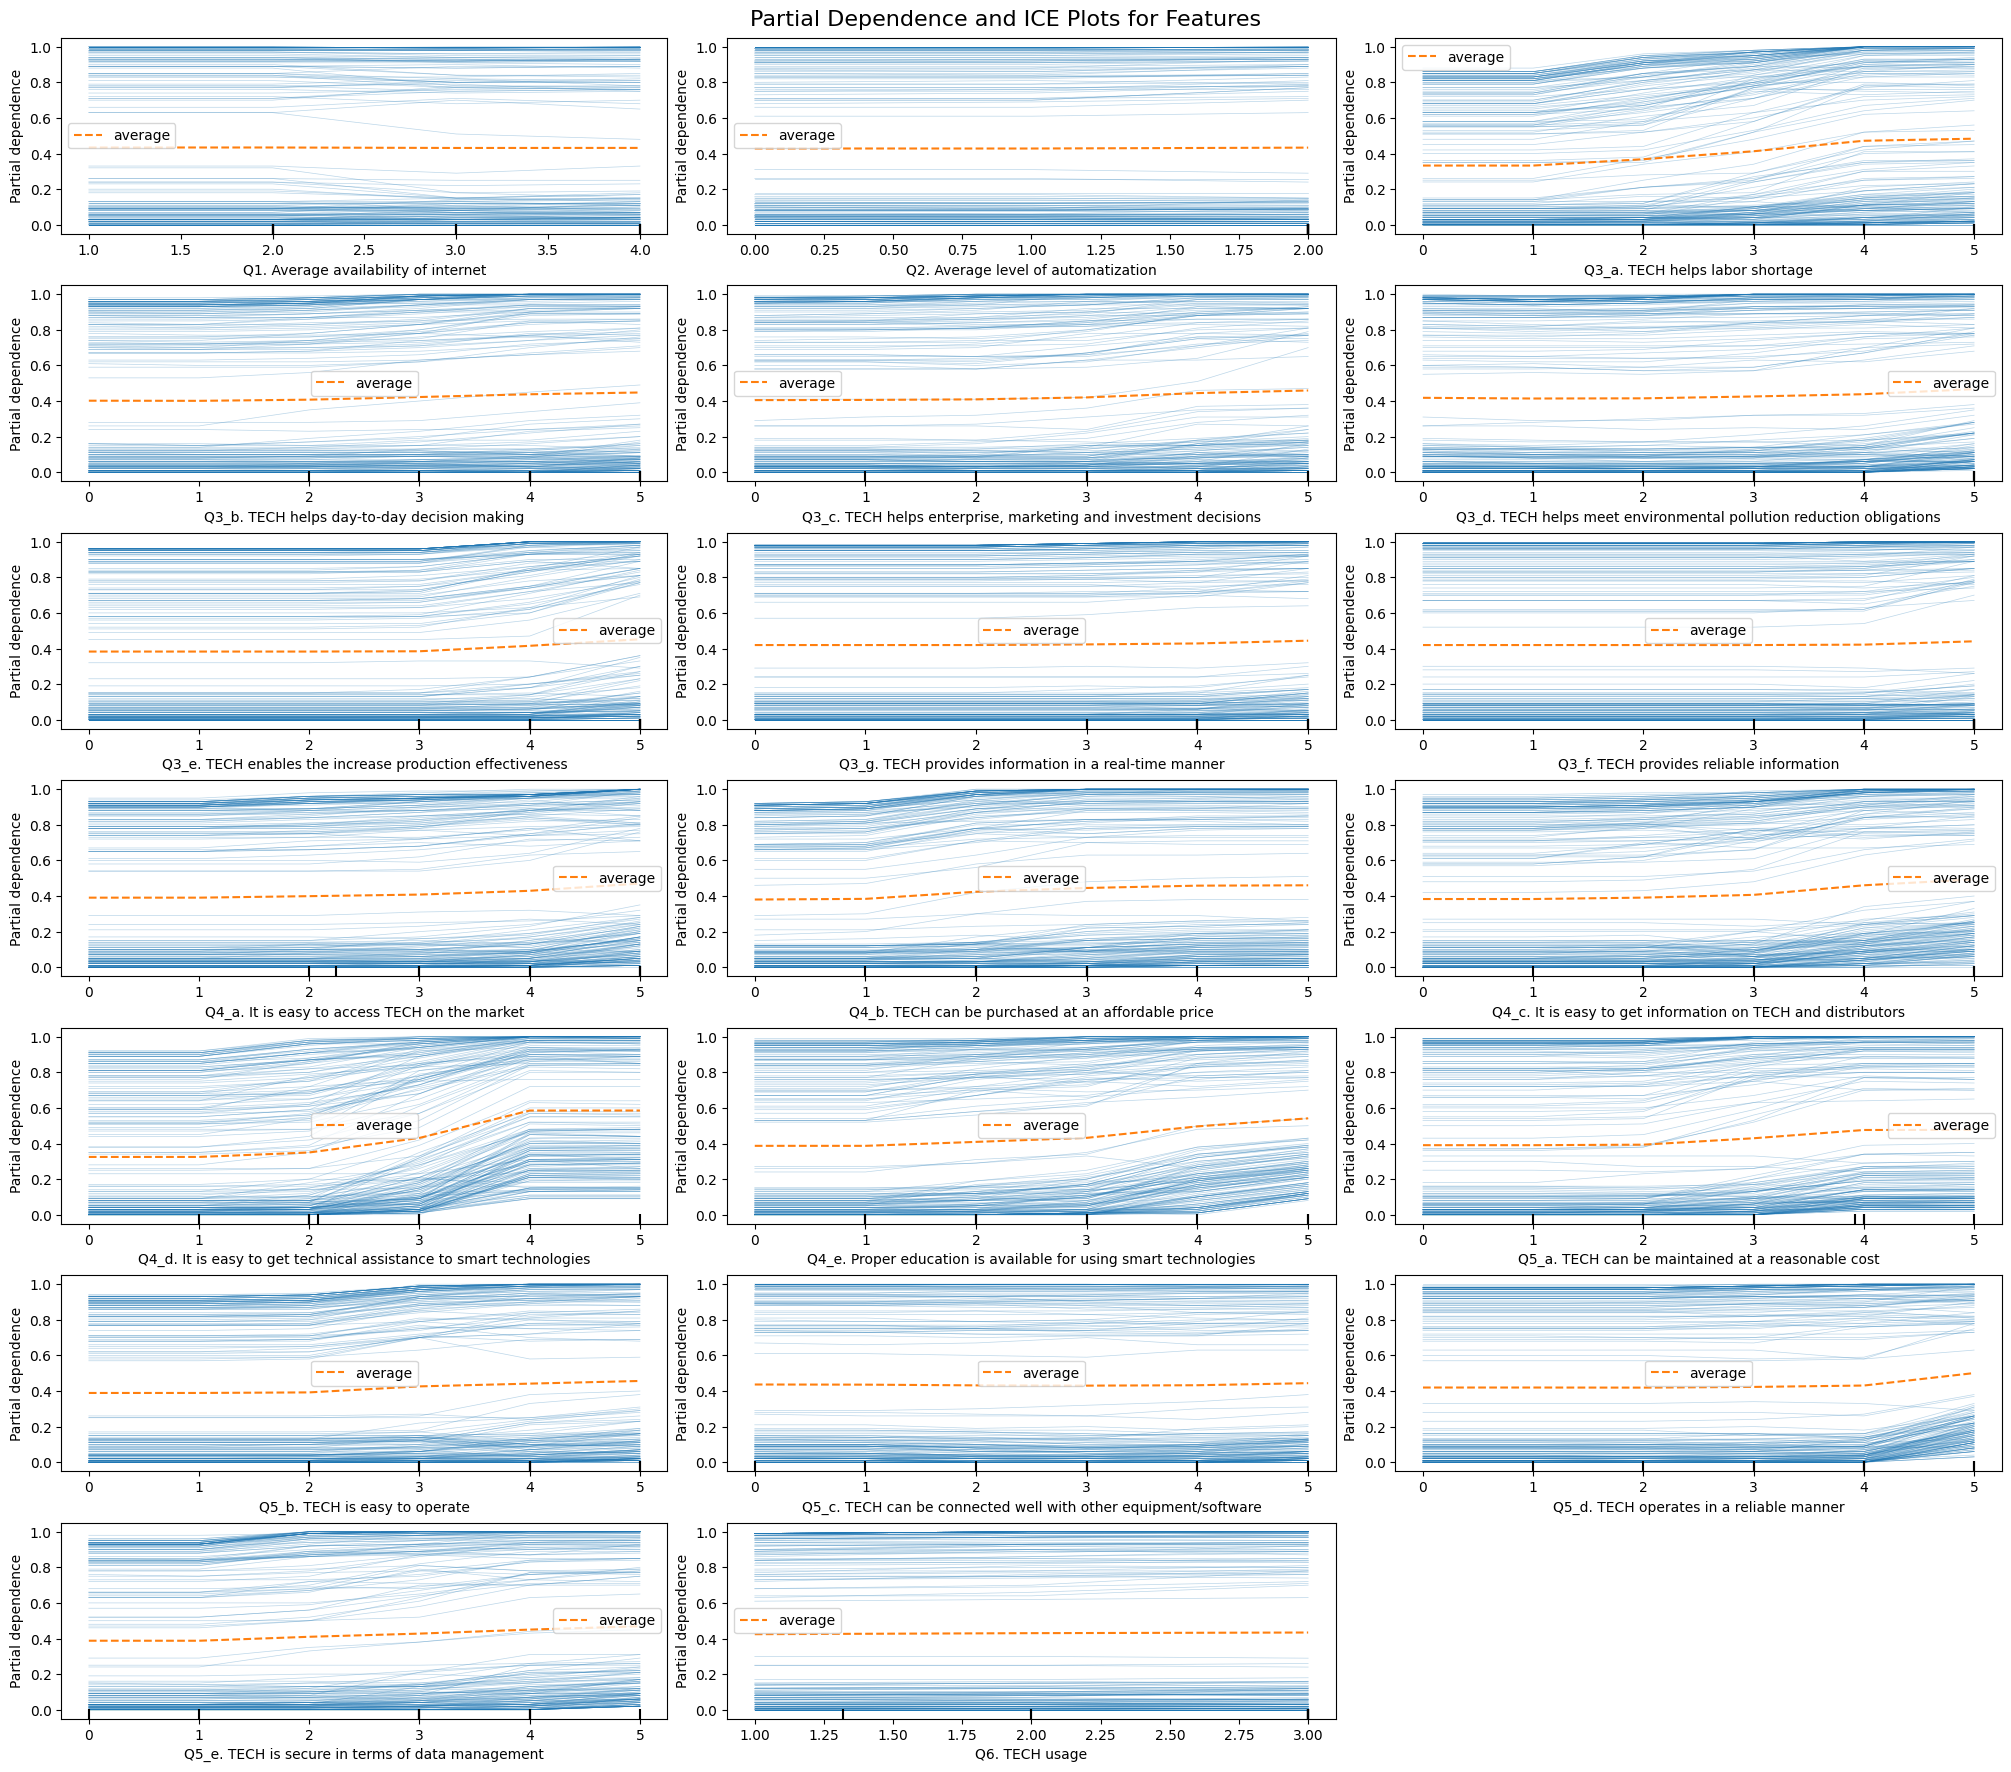

In [87]:
desired_value = 1  # Desired value for the column of interest


# Define features for which to create PDP and ICE plots
features = list(range(X_train.shape[1]))  # Indices of all features

# Plot partial dependence and ICE plots
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(20, 20), constrained_layout=True)

# Loop through the features and create subplots
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    PartialDependenceDisplay.from_estimator(
        clf, 
        X_train, 
        [feature], 
        kind='both', 
        grid_resolution=50, 
        ax=ax[row, col],
        feature_names=X_train.columns,
        target=desired_value
    )

# Remove empty subplots
for i in range(len(features), 24):
    row, col = divmod(i, 3)
    fig.delaxes(ax[row, col])

plt.suptitle('Partial Dependence and ICE Plots for Features', fontsize=16)
plt.show()
plt.savefig('..\images\Partial_dependence_ICE_plots_{} - {}.png'.format(no_clusters, question))




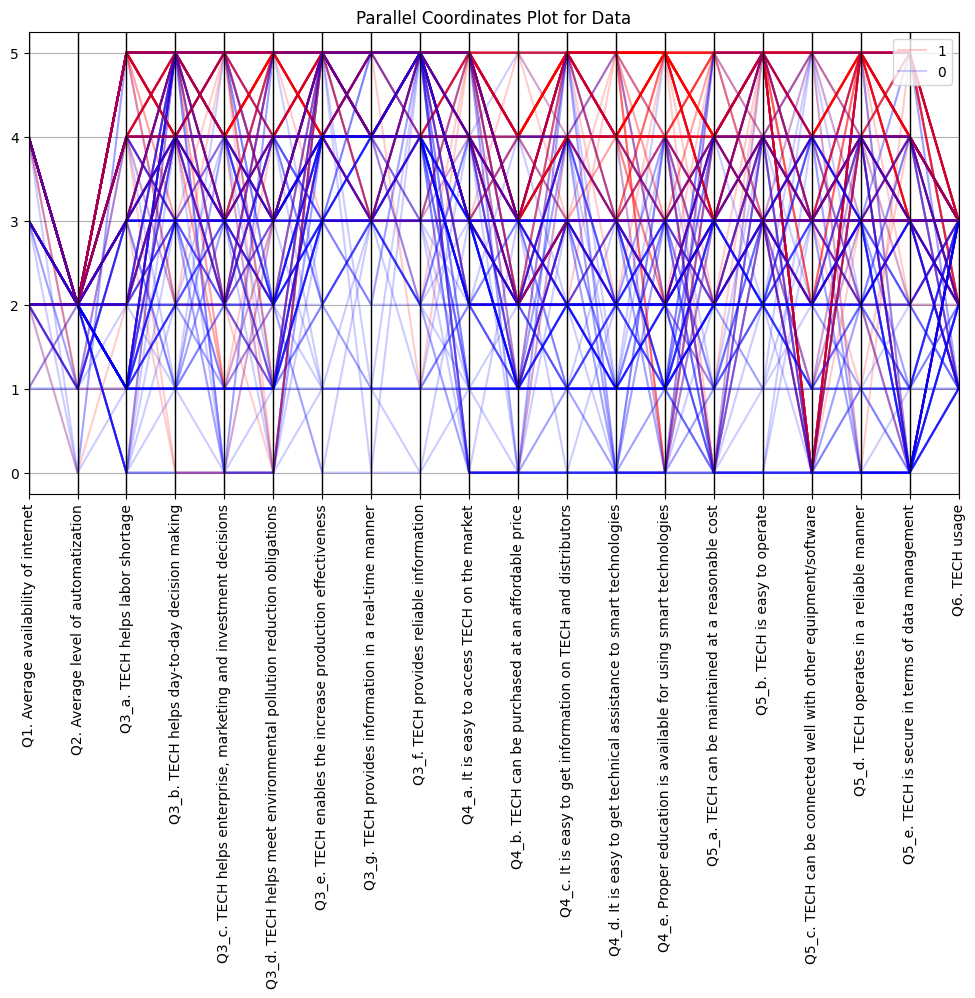

In [83]:
# generate a parallel coordinates plot for the data
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, 'labels', color=('red', 'blue'), alpha=0.2)
plt.title('Parallel Coordinates Plot for Data')
plt.xticks(rotation=90)
plt.show()

plt.savefig('..\images\Parallel_coordinates_plot_{} - {}.png'.format(no_clusters, question))



In [84]:

from sklearn.inspection import partial_dependence
for feature in range(20):
    deciles = {0: np.linspace(0, 5, num=6)}
    pd_results = partial_dependence(
        clf, X_train, features=feature, kind="both", grid_resolution=50)
    display = PartialDependenceDisplay(
        [pd_results], features=[(feature,)], feature_names=X_train.columns,
        target_idx=desired_value, deciles=deciles
    )
    display.plot()
    plt.show()
# features, feature_names = [(0,)], [f"Features #{i}" for i in range(X.shape[1])]
# deciles = {0: np.linspace(0, 5, num=6)}
# pd_results = partial_dependence(
#     clf, X, features=0, kind="average", grid_resolution=50)
# display = PartialDependenceDisplay(
#     [pd_results], features=features, feature_names=feature_names,
#     target_idx=0, deciles=deciles
# )
# display.plot()
# plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 1